## Import packages

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Import necessary modules for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# `train_test_split`: Splits arrays or matrices into random train and test subsets
# `GridSearchCV`: Exhaustive search over specified parameter values for an estimator
# `cross_val_score`: Evaluate a score by cross-validation

from sklearn.impute import SimpleImputer
# `SimpleImputer`: Imputation of missing values using a specified strategy (mean, median, etc.)

from sklearn.preprocessing import (OrdinalEncoder,
                                   OneHotEncoder,
                                   StandardScaler,
                                   PowerTransformer,
                                   MinMaxScaler,
                                  RobustScaler)
# `OrdinalEncoder`: Encode categorical features as ordinal integers
# `OneHotEncoder`: Encode categorical features as a one-hot numeric array
# `StandardScaler`: Standardize features by removing the mean and scaling to unit variance
# `PowerTransformer`: Apply a power transformation to make data more Gaussian-like

from sklearn.pipeline import Pipeline
# `Pipeline`: Construct a pipeline of multiple steps, where each step is a tuple of a name and a transformer/estimator

from sklearn.compose import ColumnTransformer
# `ColumnTransformer`: Apply transformers to columns of an array or pandas DataFrame

from sklearn.base import BaseEstimator, TransformerMixin
# `BaseEstimator`: Base class for all estimators
# `TransformerMixin`: Mix-in class for all transformers

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# `mean_squared_error`: Compute the mean squared error (MSE) regression loss
# `r2_score`: Compute the coefficient of determination (R² score)
# `mean_absolute_error`: Compute the mean absolute error (MAE) regression loss

from sklearn.inspection import partial_dependence
# `partial_dependence`: Compute partial dependence plots of the features

from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.svm import SVR

from sklearn.metrics import make_scorer, r2_score


In [77]:
from skopt import gp_minimize
# `gp_minimize`: Function for performing Bayesian optimization using Gaussian Processes

from skopt.plots import plot_convergence, plot_evaluations, plot_objective
# `plot_convergence`: Plot showing how the best score improves over iterations
# `plot_evaluations`: Plot showing the distribution of evaluations across the search space
# `plot_objective`: Plot showing the objective function values across the search space

from skopt.space import Real, Integer, Categorical
# `Real`: Define a continuous real-valued parameter in the search space
# `Integer`: Define an integer-valued parameter in the search space
# `Categorical`: Define a categorical parameter in the search space

from skopt.utils import use_named_args
# `use_named_args`: A decorator to convert hyperparameter optimization results into function arguments


In [78]:
from feature_engine.outliers import Winsorizer
# `Winsorizer`: A transformer for capping outliers by replacing extreme values with specified percentiles
# It helps in handling outliers by setting them to the specified quantile values

In [79]:
import shap
# `shap`: A library for SHapley Additive exPlanations, which provides tools for model interpretability
# It helps in understanding the contribution of each feature to the model's predictions through visualizations like summary plots, dependence plots, and force plots

In [80]:
import joblib
# `joblib`: A library for saving and loading Python objects, especially useful for saving trained machine learning models and large arrays efficiently
# It supports serialization of Python objects to disk, which is useful for persisting model state between sessions

## read dataset and preparing data

In [81]:
cols = [f"F{i}" for i in range(1,17)]

# Read the CSV file and select only the specified columns
df = pd.read_csv("./new data/output/processed/FINAL-REDUCED-DATA.csv", usecols=cols)

# Display the first few rows of the dataframe to check the loaded data
df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,0.306471,0.241413,0.214418,0.191128,0.295488,0.701202,1.546019,3.772608,3.453947,0.480146,0.148510,7.741639,1.215003,0.487587,0.193592,0.800855
1,0.267762,0.240176,0.223380,0.197235,0.350100,0.769845,1.775037,3.999900,4.594070,0.506838,0.230527,8.320908,0.618932,0.270899,0.038072,0.328286
2,0.254699,0.245160,0.214582,0.185236,0.292934,0.695408,1.581410,3.996229,3.976882,0.580367,0.347703,7.570802,0.980762,0.416822,0.089281,0.046231
3,0.126061,0.090039,0.049724,0.047979,0.075311,0.192731,1.569660,4.698025,4.985870,0.462886,0.275856,2.115075,1.443694,0.486900,0.137990,-0.240473
4,0.046033,-0.032316,-0.093502,-0.097348,-0.090681,-0.184116,0.931511,3.551270,3.462843,0.539266,0.282761,NaN,1.816625,0.775727,0.509025,-0.160583


In [82]:
# Display statistical summary of the DataFrame
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,346.000000,418.000000,418.000000,418.000000,418.000000
mean,0.290131,0.239426,0.265368,0.240733,0.284587,0.525539,1.508325,5.080289,12.255097,0.489760,0.128187,268.457653,1.980440,1.259381,0.403779,0.302699
std,0.193531,0.202874,0.285274,0.275481,0.248267,0.842710,1.147969,4.112424,26.483048,0.229126,0.135365,2312.067363,1.440295,1.233205,0.801422,1.632261
min,-0.584242,-0.454052,-0.652406,-0.658797,-0.400242,-10.076653,0.040988,0.015250,0.153217,0.066015,0.000000,0.084158,0.205195,0.113388,0.001255,-0.546729
25%,0.152945,0.094831,0.098019,0.078651,0.096007,0.250761,0.788786,2.269776,3.232689,0.327832,0.016798,4.217867,1.251544,0.669877,0.058214,-0.182886
50%,0.263790,0.204569,0.223639,0.195211,0.260381,0.546767,1.193650,3.884375,5.607171,0.456039,0.084659,13.093505,1.583106,0.959643,0.142563,-0.065770
75%,0.414855,0.378688,0.407414,0.363778,0.435096,0.884044,1.807746,6.263765,11.175275,0.625185,0.203113,41.747101,2.298708,1.381003,0.392960,0.215092
max,0.917693,0.862629,2.949693,2.944823,1.238016,3.615849,9.268860,27.512415,406.181505,1.505271,0.748387,40182.590080,13.455077,11.382865,7.441243,24.431337


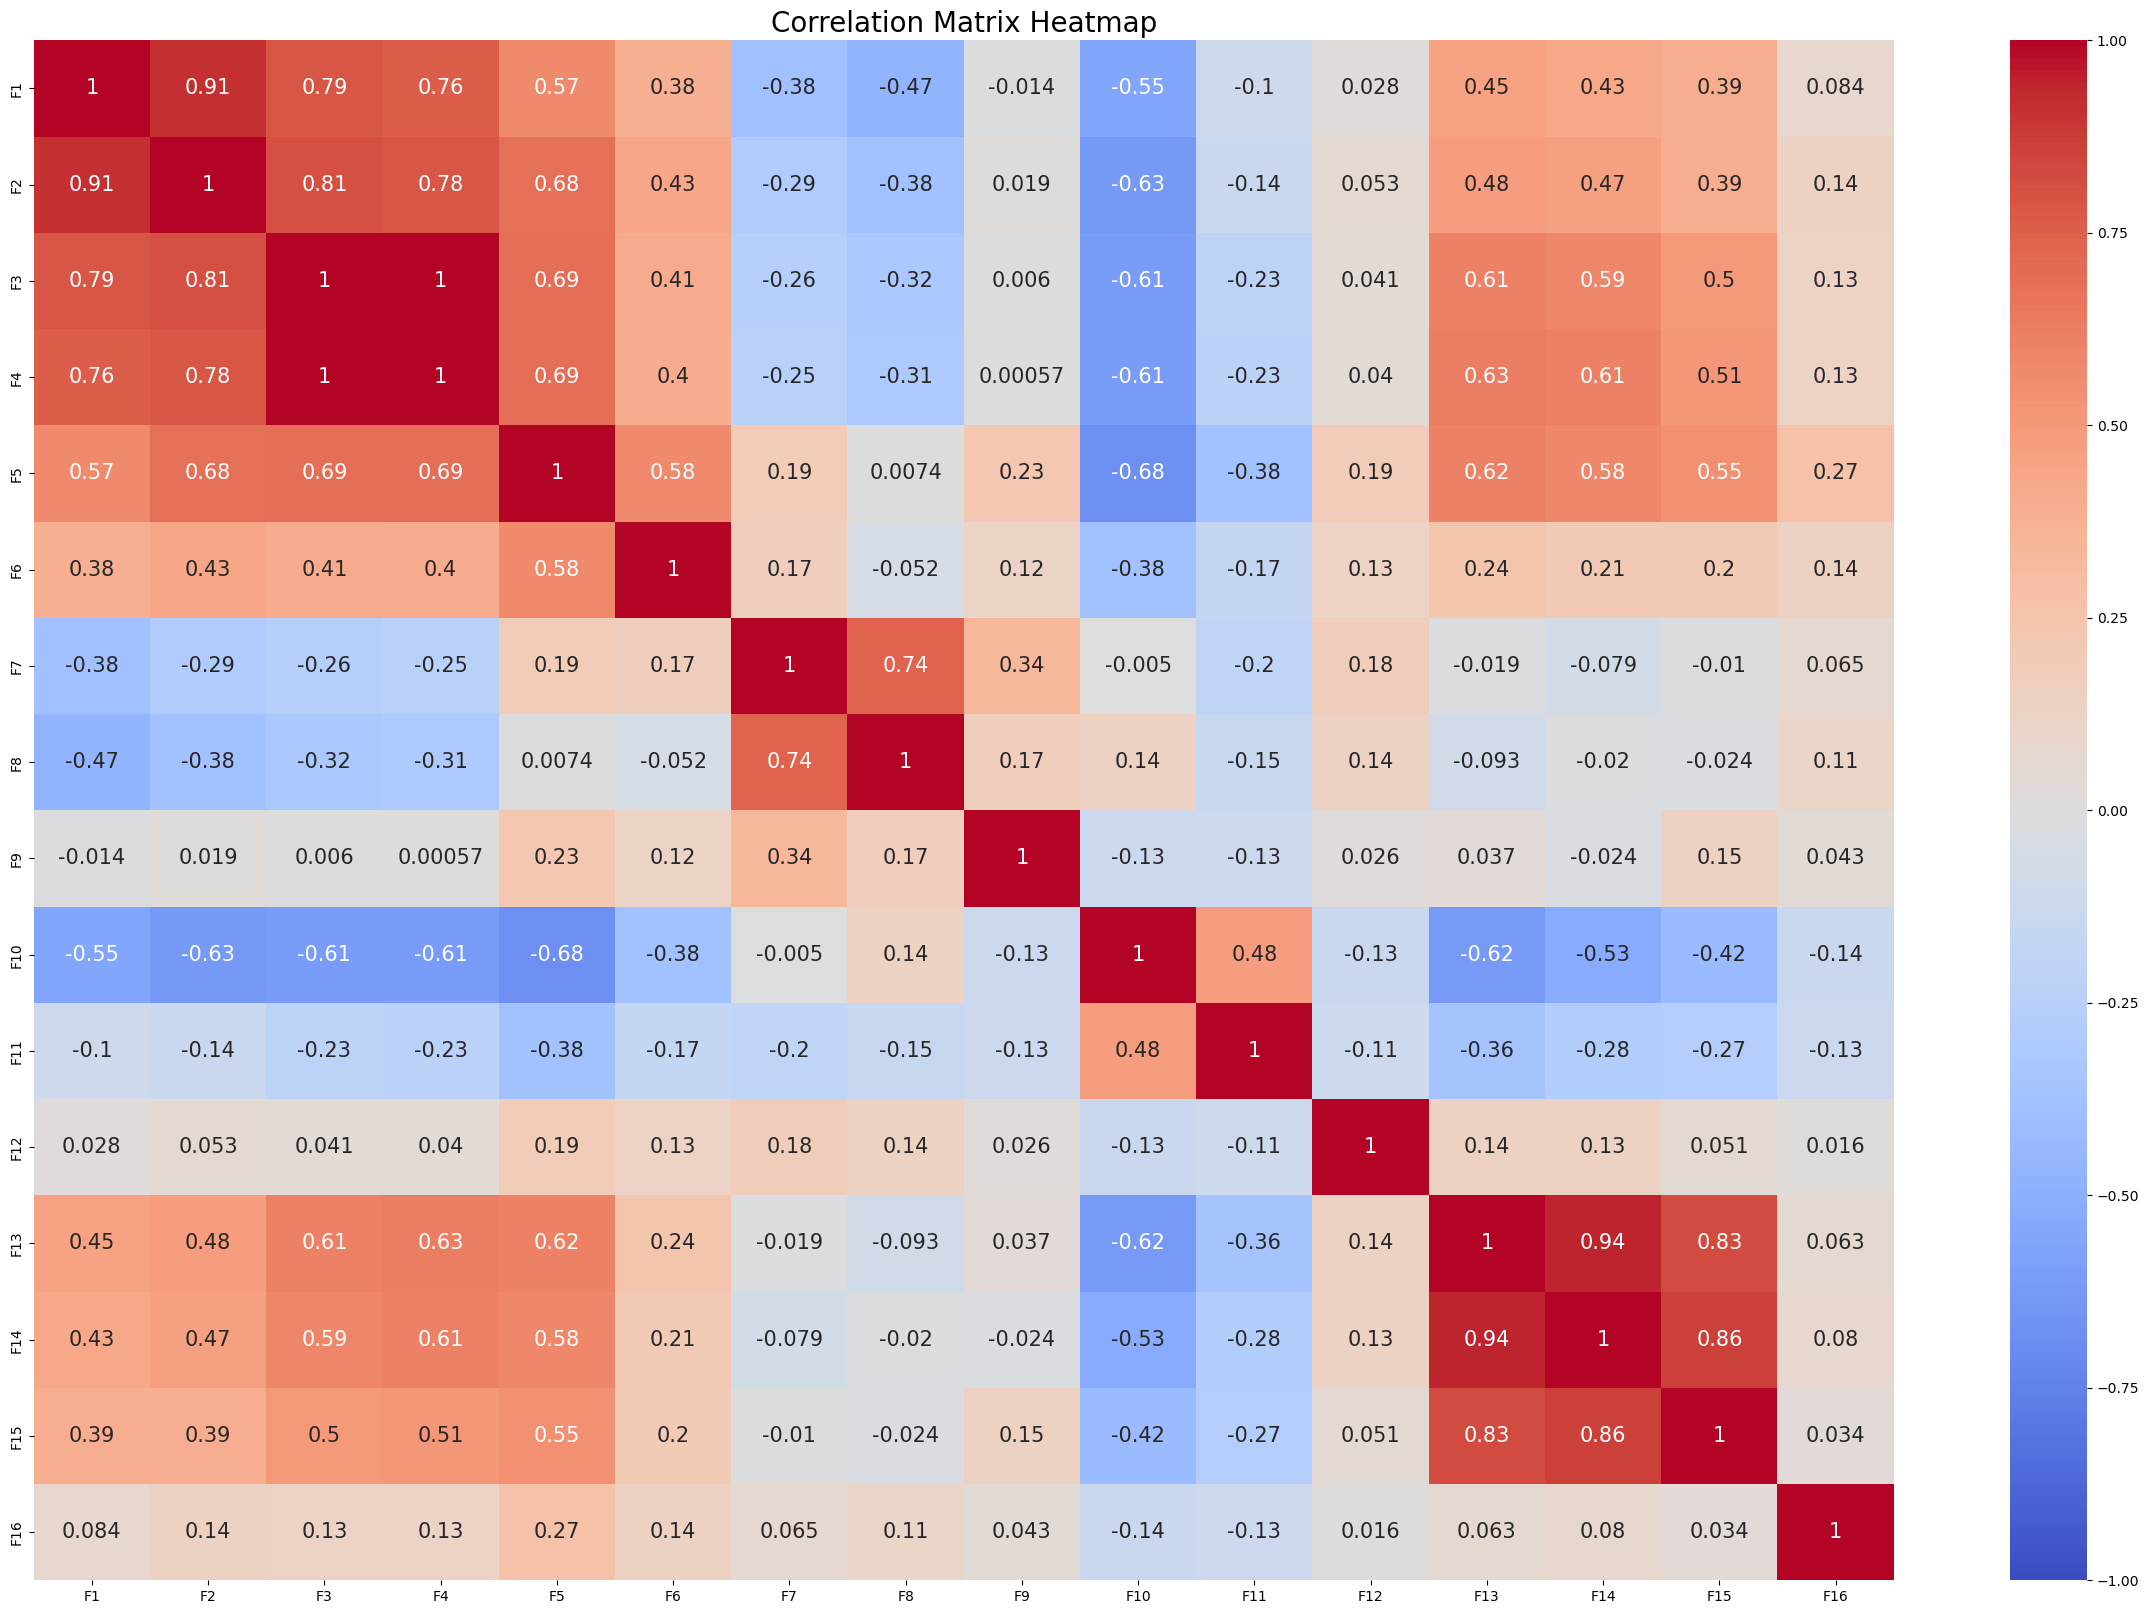

In [83]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap with larger annotations
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    annot_kws={"size": 15}  # Set the font size for annotations
)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Save the heatmap to a file
plt.savefig('./new data/output/processed/heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot (optional, if you want to display it)
plt.show()


In [120]:
# Drop the target column "F36" from the DataFrame to create the feature set X
X = df.drop("F16", axis=1)

# Extract the target column "F36" from the DataFrame and assign it to y
y = df["F16"]

# Split the data into training and test sets
# - X_train: Features for training
# - X_test: Features for testing
# - y_train: Target for training
# - y_test: Target for testing
# - test_size=0.3 specifies that 30% of the data will be used for testing, and 70% for training
# - random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## modeling and training

In [121]:
# Define the updated CustomMaxImputer
class CustomMaxImputer(BaseEstimator, TransformerMixin):
    """
    A custom imputer that replaces NaNs with 3 times the max of each column.
    """
    def fit(self, X, y=None):
        # Compute 3 times the max of each column
        self.fill_values_ = 3 * X.max(axis=0)
        return self
    
    def transform(self, X):
        # Replace NaNs with the precomputed 3 * max values
        return X.fillna(self.fill_values_)
    
    def get_params(self, deep=True):
        # Return an empty dictionary because there are no hyperparameters to tune in this transformer
        return {}
    
    def set_params(self, **params):
        # This method is needed to comply with scikit-learn's interface
        return self


# Instantiate the custom imputer
custom_max_imputer = CustomMaxImputer()

In [122]:
# General numerical imputer (for other numerical columns)
general_imputer = SimpleImputer(strategy='mean')  #'median'

In [123]:
robust_scaler = RobustScaler()

In [124]:
# Define a PowerTransformer for skewed data
skewed_transformer = PowerTransformer(method='yeo-johnson')

In [125]:
# Define a Winsorizer for handling outliers in feature columns
feature_winsorizer = Winsorizer(
    capping_method='iqr',  # Use interquartile range for capping
    tail='both',           # Cap both tails (lower and upper)
    fold=1.5,              # Cap values beyond 1.5 times the IQR
#     variables=['F1', 'F2', 'F3']  # List your features with outliers here
)

In [126]:
# Initialize a StandardScaler instance
# StandardScaler standardizes features by removing the mean and scaling to unit variance
std_scaler = StandardScaler()

In [127]:
numerical_features1 = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features2 = X_train.columns.tolist()

if numerical_features1 == numerical_features2:
    print(1)

1


In [128]:
# Columns with missing values due to division by zero
features_to_custom_max_imputer = ["F12"]

# General numerical columns excluding the specific ones
numerical_features = X_train.columns.tolist()
numerical_features_general = [col for col in numerical_features if col not in features_to_custom_max_imputer]

In [129]:
# Define the preprocessing steps using ColumnTransformer
imputer = ColumnTransformer(
    transformers=[
        ('custom_imputer', custom_max_imputer, features_to_custom_max_imputer),  # Apply CustomMaxImputer to specific columns
        ('general_imputer', general_imputer, numerical_features_general),  # Apply SimpleImputer to other numerical columns
    ],
    remainder='passthrough'  # Keep all other columns as is
)

In [130]:
preprocessor = Pipeline(steps=[
    ('imputer', imputer),                           # Step 1: Apply imputer to all features
    ('robust_scaler', robust_scaler),
#     ('winsorizer', feature_winsorizer),            # Step 2: Apply Winsorizer to all features
    ('skewed', skewed_transformer),                # Step 3: Apply PowerTransformer to correct skewness
    ('scaler', std_scaler)                         # Step 3: Standard scaling
])   
    

In [131]:
# Define the SVR regressor with default parameters
regressor = SVR(
    C=1.0,         # Regularization parameter
    epsilon=0.1,   # Epsilon in the epsilon-SVR model
    kernel='rbf',  # Kernel type
    degree=3,      # Degree of the polynomial kernel function (if kernel='poly')
    gamma='scale'  # Kernel coefficient (if kernel='rbf', 'poly', or 'sigmoid')
)

In [132]:
# Initialize Yeo-Johnson for the target (handles both positive and negative values)
yeo_transformer = PowerTransformer(method='yeo-johnson')

In [133]:
# Apply Yeo-Johnson transformation to y_train
y_train_transformed = yeo_transformer.fit_transform(y_train.to_frame()).ravel()

In [134]:
# Initialize RobustScaler for scaling the transformed target variable
target_scaler = RobustScaler()

In [135]:
# Apply RobustScaler to the transformed target
y_train_scaled = target_scaler.fit_transform(y_train_transformed.reshape(-1, 1)).ravel()

In [136]:
# Calculate median and IQR used for scaling
median = target_scaler.center_[0]
iqr = target_scaler.scale_[0] * 1.349  # Note: RobustScaler uses 'scale' instead of direct IQR

# Print statistics of scaled data
print("Minimum value of y_train_scaled:", np.min(y_train_scaled))
print("Maximum value of y_train_scaled:", np.max(y_train_scaled))

# Approximate theoretical range
print("Approximate theoretical minimum of scaled data:", -iqr)
print("Approximate theoretical maximum of scaled data:", iqr)

Minimum value of y_train_scaled: -2.2319113610219383
Maximum value of y_train_scaled: 1.9984457516615852
Approximate theoretical minimum of scaled data: -1.6706828675772716
Approximate theoretical maximum of scaled data: 1.6706828675772716


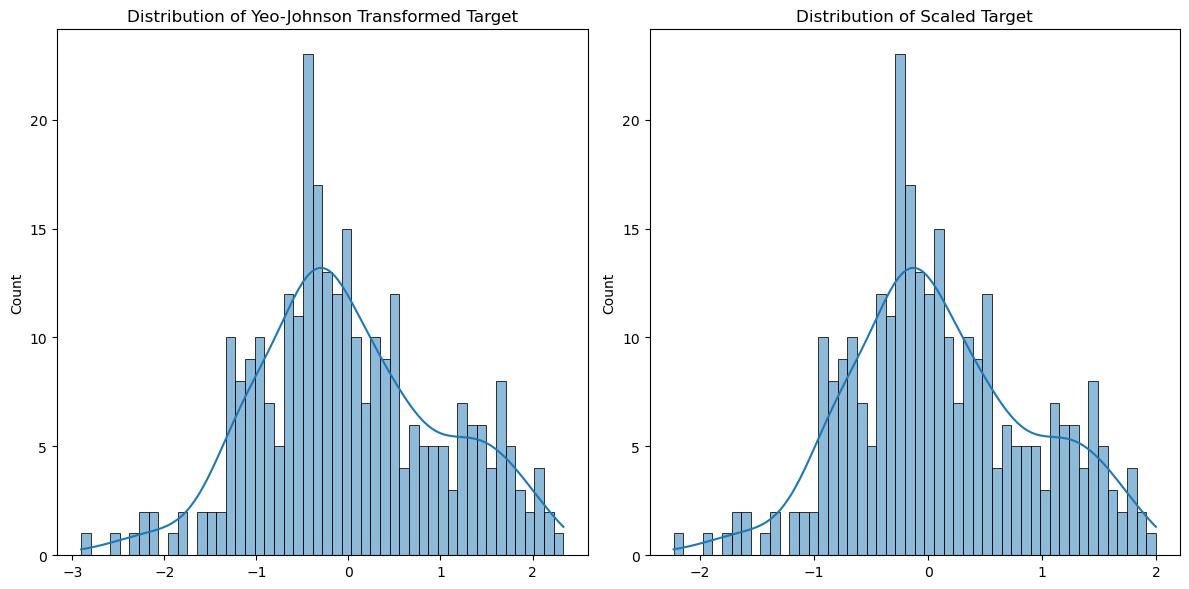

Statistics of y_train_transformed:
Min: -2.903739077429428
Max: 2.3353900196009767
Median: -0.13960559128382177
IQR: 1.2384602428297047
Statistics of y_train_scaled:
Min: -2.2319113610219383
Max: 1.9984457516615852
Median: 1.1275702593849246e-17


In [137]:
# Plot distribution of transformed target variable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train_transformed, bins=50, kde=True)
plt.title('Distribution of Yeo-Johnson Transformed Target')

plt.subplot(1, 2, 2)
sns.histplot(y_train_scaled, bins=50, kde=True)
plt.title('Distribution of Scaled Target')

plt.tight_layout()
plt.show()

# Display basic statistics
print("Statistics of y_train_transformed:")
print("Min:", np.min(y_train_transformed))
print("Max:", np.max(y_train_transformed))
print("Median:", np.median(y_train_transformed))
print("IQR:", np.percentile(y_train_transformed, 75) - np.percentile(y_train_transformed, 25))

print("Statistics of y_train_scaled:")
print("Min:", np.min(y_train_scaled))
print("Max:", np.max(y_train_scaled))
print("Median:", np.median(y_train_scaled))


In [138]:
# Print the minimum and maximum values of y_train_scaled
print("Minimum value of y_train_scaled:", y_train_scaled.min())
print("Maximum value of y_train_scaled:", y_train_scaled.max())

Minimum value of y_train_scaled: -2.2319113610219383
Maximum value of y_train_scaled: 1.9984457516615852


In [139]:
# Create a pipeline with preprocessing, feature selection, and regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Step 1: Apply preprocessing steps
    ("regressor", regressor)  # Step 3: Fit the LinearRegression model
])

### hyper parameter optimization

In [140]:
# Define the updated search space including preprocessing steps
search_space = [
    # SVR Hyperparameters
    Real(1e-3, 1e3, prior='log-uniform', name='regressor__C'),                 # Regularization parameter
    Real(1e-4, 1.0, prior='log-uniform', name='regressor__epsilon'),          # Epsilon in the epsilon-SVR model
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='regressor__kernel'),  # Kernel type
    Integer(2, 5, name='regressor__degree'),                                  # Degree of the polynomial kernel function (if kernel='poly')
    Categorical(['scale', 'auto'], name='regressor__gamma'),                 # Kernel coefficient
    Categorical([True, False], name='regressor__shrinking'),                 # Whether to use the shrinking heuristic
    Real(1e-5, 1e-2, prior='log-uniform', name='regressor__tol'),            # Tolerance for stopping criterion

    # Preprocessor Hyperparameters
    Categorical([True, False], name='preprocessor__scaler__with_mean'),      # With mean parameter for StandardScaler
    Categorical([True, False], name='preprocessor__scaler__with_std')        # With standard deviation parameter for StandardScaler
]

In [141]:
# Define the objective function for Bayesian optimization using gp_minimize
@use_named_args(search_space)
def objective(**params):
    # Update the pipeline parameters with the current set of hyperparameters
    model.set_params(**params)
    
    # Define the RMSE scoring function (neg_mean_squared_error for RMSE)
#     rmse_scorer = make_scorer(mean_squared_error, squared=False)
    
    # Perform cross-validation to evaluate the model's performance with the given hyperparameters
    score = cross_val_score(
        model,                           # The pipeline object to evaluate
        X_train,                         # Training features
        y_train_scaled,                  # Training target variable (Yeo-Johnson transformed and scaled)
        cv=5,                            # Number of cross-validation folds
        scoring="neg_root_mean_squared_error"              # Metric to use for evaluation (RMSE)
    )
    
    # Return the mean score (gp_minimize minimizes the objective function, no need to negate for RMSE)
    return -np.mean(score)  # We minimize RMSE, so return mean RMSE

In [142]:
# Perform hyperparameter optimization using Gaussian Process-based Bayesian optimization
result = gp_minimize(
    func=objective,
    dimensions=search_space,
    n_calls=40,
    random_state=42,
    n_initial_points=12,
    acq_func="EI"
)

# Output the best hyperparameters and best score
print("Best hyperparameters found: ", result.x)
print("Best score: ", -result.fun)

Best hyperparameters found:  [34.05402589268701, 0.00501907283396132, 'linear', 4, 'scale', False, 0.00022349221517675515, True, False]
Best score:  -0.6911179410512672


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

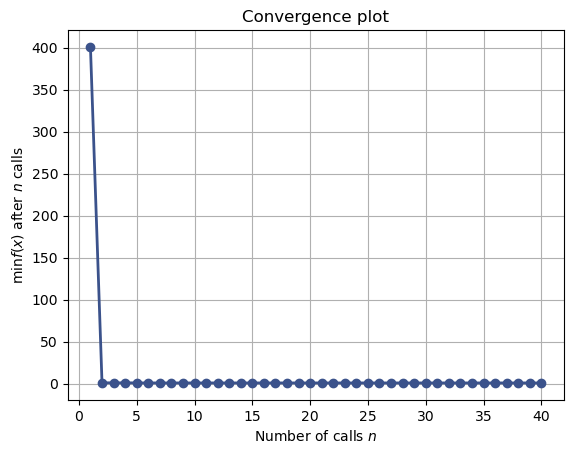

In [143]:
plot_convergence(result)

In [144]:
dim_names = [
    'regressor__C',             
    'regressor__epsilon',                       
    'regressor__kernel',               
    'regressor__degree',                
    'regressor__gamma',
    'regressor__shrinking',
    'regressor__tol',
    

    'preprocessor__scaler__with_mean',                # preprocessor__scaler__with_mean
    'preprocessor__scaler__with_std'                  # preprocessor__scaler__with_std
]


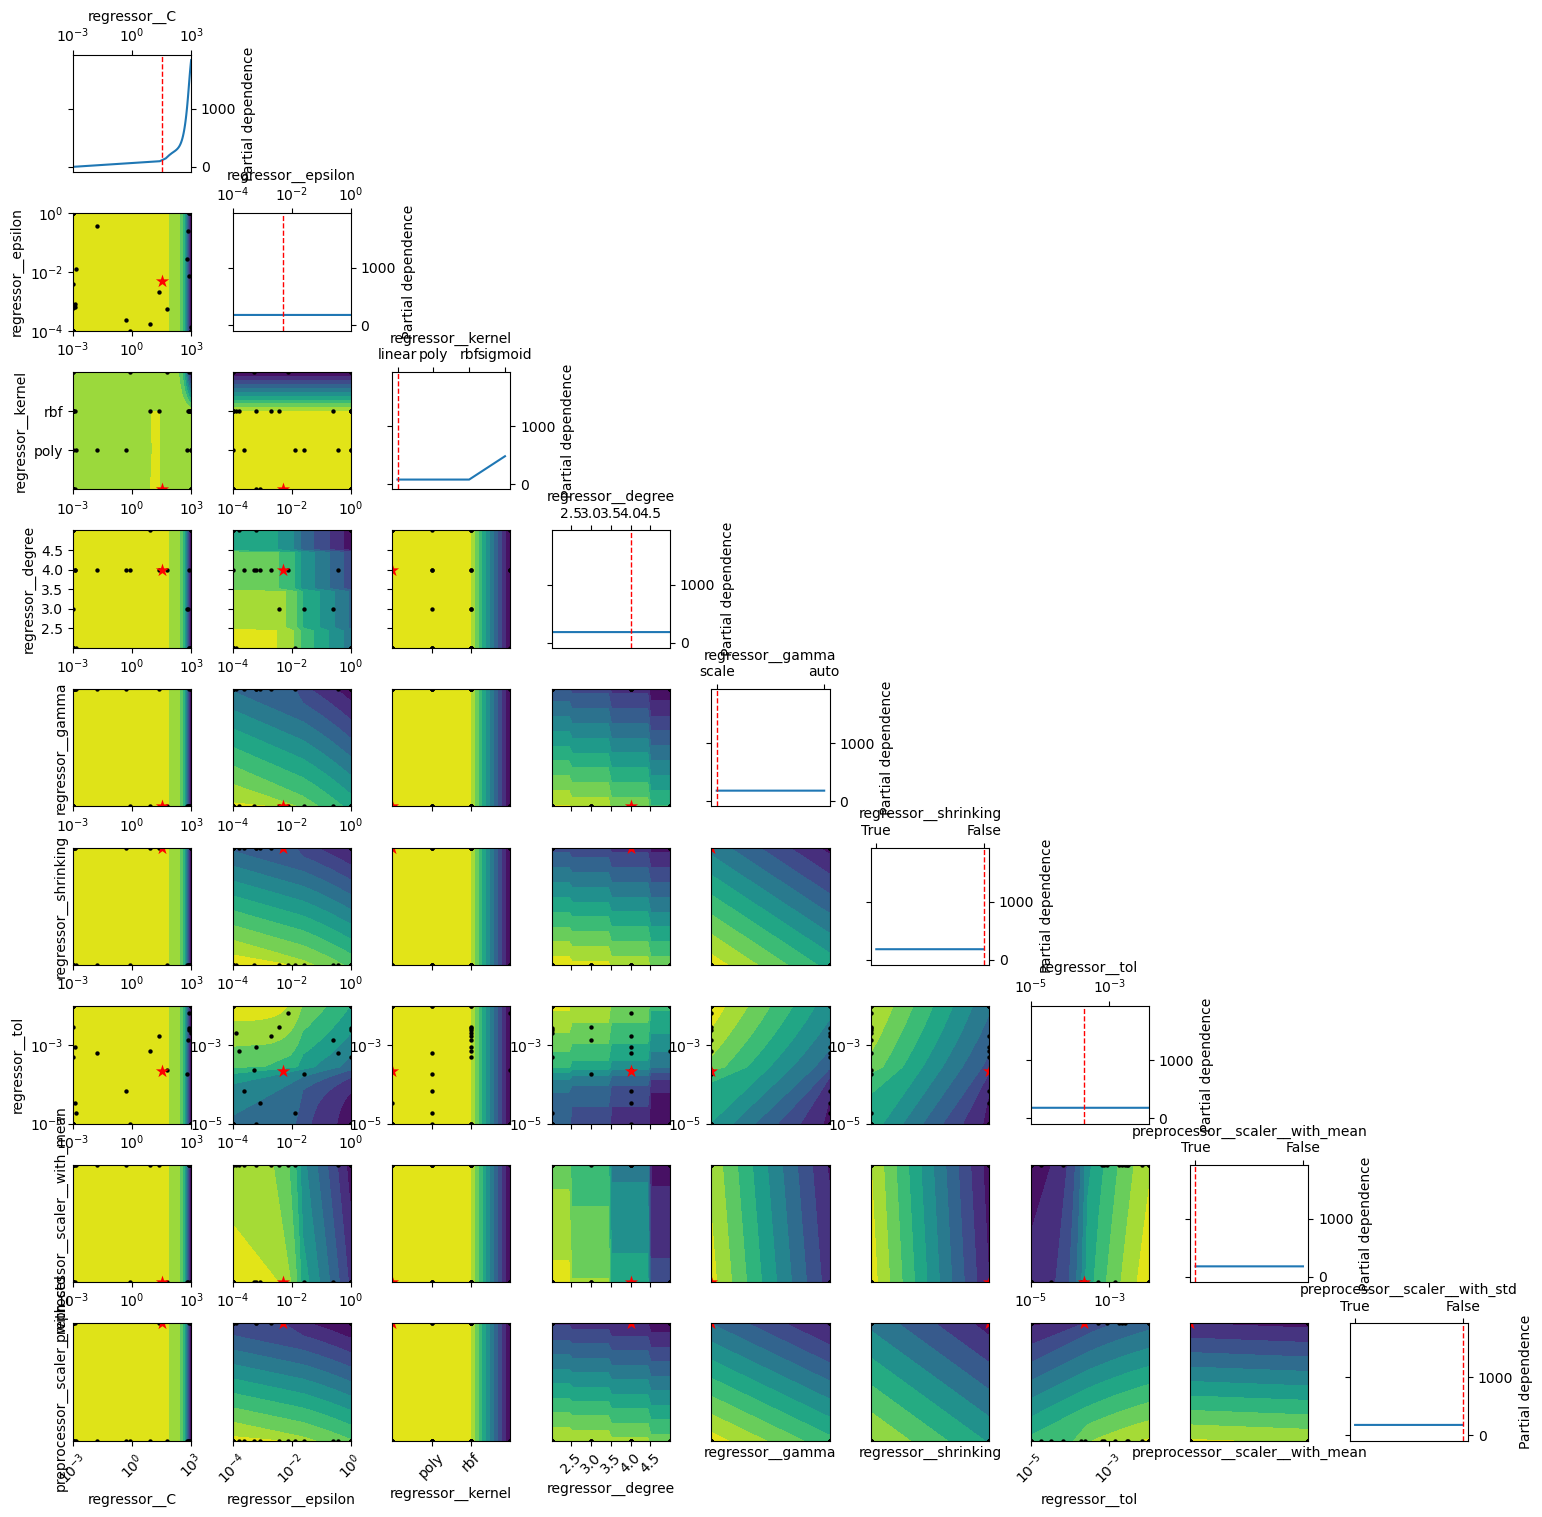

In [145]:
plot_objective(result=result, plot_dims=dim_names)
plt.show()

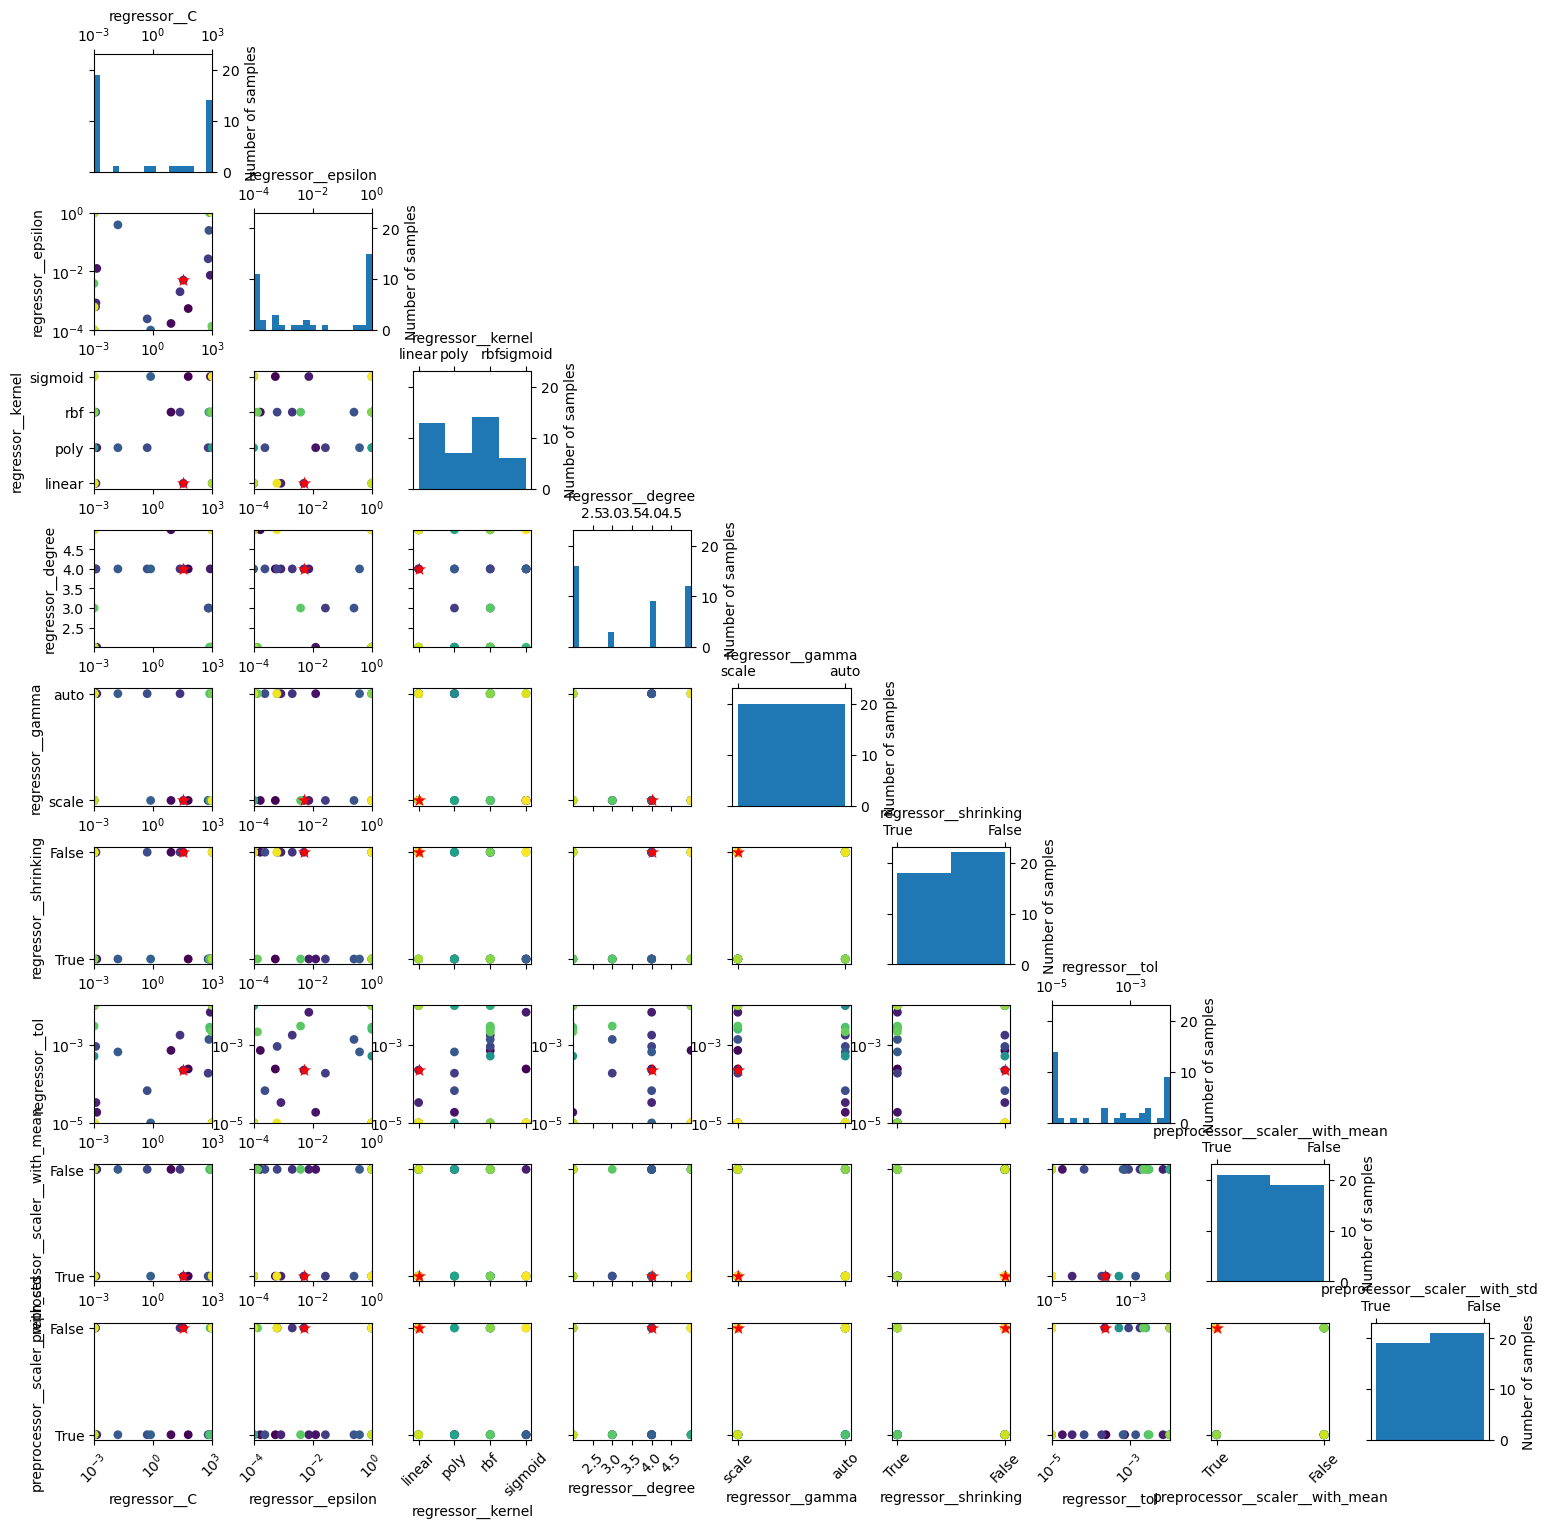

In [146]:
plot_evaluations(result=result, plot_dims=dim_names)
plt.show()

### fitting the model based on best hyperparameter

In [147]:
# Fit the pipeline with the best parameters on the entire training set
best_params = dict(zip([param.name for param in search_space], result.x))
model.set_params(**best_params)
model.fit(X_train, y_train_scaled)  # Fit with winsorized and scaled target

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('custom_imputer',
                                                                   CustomMaxImputer(),
                                                                   ['F12']),
                                                                  ('general_imputer',
                                                                   SimpleImputer(),
                                                                   ['F1', 'F2',
                                                                    'F3', 'F4',
                                                                    'F5', 'F6',
                                                                    'F7', 'F8',
                                                                    'F9', 'F10',
                                                                    'F11',
                                                                    'F13',
                                                                    'F14',
                                                                    'F15'])])),
                                 ('robust_scaler', RobustScaler()),
                                 ('skewed', PowerTransformer()),
                                 ('scaler', StandardScaler(with_std=False))])),
                ('regressor',
                 SVR(C=34.05402589268701, degree=4, epsilon=0.00501907283396132,
                     kernel='linear', shrinking=False,
                     tol=0.00022349221517675515))])

In [148]:
# Apply the same transformations to the test target variable
# Transform y_test using the fitted Yeo-Johnson transformer
y_test_transformed = yeo_transformer.transform(y_test.to_frame()).ravel()

# Scale the transformed y_test using the fitted RobustScaler
y_test_scaled = target_scaler.transform(y_test_transformed.reshape(-1, 1)).ravel()

In [149]:
# Predict on test set
y_pred = model.predict(X_test)

### evaluation the model

In [150]:
# Evaluate model performance on the test set with winsorized target
mse = mean_squared_error(y_test_scaled, y_pred)
print("Mean Squared Error on test set: ", mse)

Mean Squared Error on test set:  0.5278103330784221


In [151]:
# Calculate additional metrics
mae = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.5536585303825223
R-squared: 0.057017940912437504


In [152]:
# Calculate evaluation metrics
r2 = r2_score(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled, y_pred)

# Output the metrics
print("R²: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R²:  0.057017940912437504
MSE:  0.5278103330784221
RMSE:  0.7265055630058328
MAE:  0.5536585303825223


In [153]:
print(f"max = {max(y_test_scaled)}")
print(f"min = {min(y_test_scaled)}")
print(f"mean = {np.mean(y_test_scaled)}")
print(f"median = {np.median(y_test_scaled)}")

max = 2.017212313036264
min = -1.3332828451459697
mean = 0.11511410367343469
median = -0.035515880867288005


### feature importance

##  Cross-Validation Check

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train_scaled, cv=5, scoring='neg_mean_squared_error')

# Print mean and standard deviation of cross-validation scores
print(f"CV Mean MSE: {-cv_scores.mean()}")
print(f"CV Std MSE: {cv_scores.std()}")

### deployment

In [ ]:
joblib.dump(model, './new data/output/processed/00-06 Final SVR with optimization.pkl')